In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df_loan = pd.read_csv('Dataset\loan.csv')

d:\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_loan.shape

(2260668, 145)

In [4]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [5]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.782223,5.002082e-01,3.67

In [6]:
df_loan.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,2260668,2260668,2260668,2093699,2113761,2260668,2260668,2260668,2260668,2260668,126067,2260668,2237343,2260667,2260668,2260639,2260668,2258242,957061,2260595,2260668,115730,108021,2260668,10613,10613,10613,10613,10613,10613,10613,2260668,2260668,33056,33056,33056
unique,2,7,35,512694,11,6,3,139,9,2,124501,14,63155,956,51,754,2,135,105,140,2,3,663,2,1,9,3,26,27,26,5,2,2,82,3,89
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,,debt_consolidation,Debt consolidation,112xx,CA,Sep-2004,w,Feb-2019,Mar-2019,Feb-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Sep-2017,Dec-2017,Sep-2017,Late (16-30 days),Cash,N,Feb-2019,ACTIVE,Jan-2019
freq,1609754,663557,145903,38824,748005,1111450,886231,61992,1041952,2259986,252,1277877,1153293,23908,314533,15400,1535467,934725,953821,1398266,2139958,57403,998,2259783,10613,2965,7541,2444,1756,1715,4622,2182546,2227612,2730,14811,1725


In [7]:
df_loan.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

# Exploratory Data Analysis

In [8]:
total_data=len(df_loan)

## Loan Status
Mostly, the loan has status fuly paid by 46%, current 41%, charged off 12%, then followed by other status. While default status portion just about 0.001% or happened 1 out of 1000 cases.

Loan Status Distribution

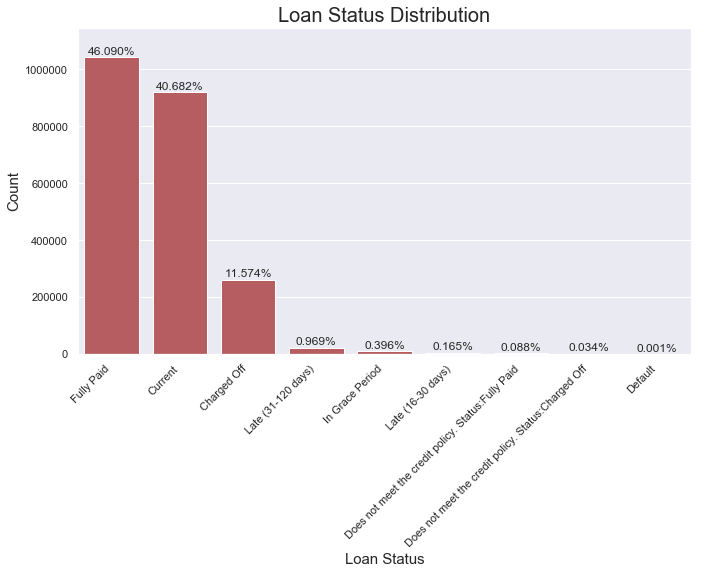

In [9]:
plt.figure(figsize=(11,6))
sns.set(style='darkgrid')
g=sns.countplot(x="loan_status", data=df_loan ,order = df_loan['loan_status'].value_counts().index ,color='r')
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Distribution", fontsize=20)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.3f}%'.format(height/total_data*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

## State
Typically, all states loan dominated by status fully paid (red), current (orange), and charged off (blue). Meanwhile, default just occur in few cases.
IA is the state with largest portion of fully paid status by 85.7%. Also the state with largest percentage of charged off beside AL by 14%. While ME is the state with largest portion of default by 0.02%.

In [10]:
status=['Current','Fully Paid','Charged Off','Default']
df=df_loan[df_loan['loan_status'].isin(status)]

<Figure size 2160x720 with 0 Axes>

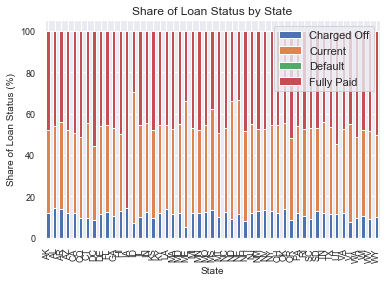

In [16]:
plt.figure(figsize=(30,10))
tab=pd.crosstab(df['addr_state'], df['loan_status'],normalize='index') * 100
tab.plot(kind='bar',legend=None,stacked=True)
plt.xlabel('State',fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Share of Loan Status (%)',fontsize=10)
plt.title('Share of Loan Status by State', fontsize=12)
plt.legend(loc='upper right')

In [13]:
tab.style.background_gradient(cmap = sns.light_palette("green", as_cmap=True))

loan_status,Charged Off,Current,Default,Fully Paid
addr_state,,,,
AK,11.9852,39.8407,0,48.174
AL,14.2937,39.7707,0.00373399,45.9318
AR,13.9901,42.1075,0,43.9024
AZ,11.785,40.1099,0,48.1051
CA,12.1599,38.3054,0.00129179,49.5333
CO,9.46233,39.317,0.00210274,51.2185
CT,9.48452,45.7698,0,44.7457
DC,8.39347,36.0046,0,55.602
DE,11.673,42.2495,0,46.0775


## Verification Status
Verification status does not strongly correlated referenced by fully paid (red), current (orange), and charged off (blue) status.
Altough, loan with verified mark has slightly better fully paid chance rate but it is not significant compared to other category of verification status.

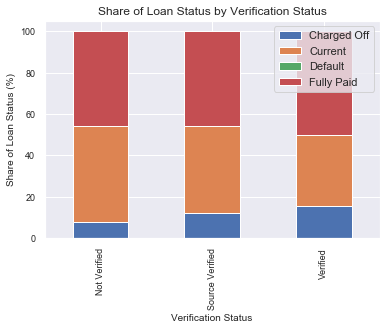

In [15]:
tab=pd.crosstab(df['verification_status'], df['loan_status'],normalize='index') * 100
tab.plot(kind='bar',legend=None,stacked=True)
plt.xlabel('Verification Status',fontsize=10)
plt.ylabel('Share of Loan Status (%)',fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Share of Loan Status by Verification Status',fontsize=12)
plt.legend(loc='upper right')

In [17]:
tab.style.background_gradient(cmap = sns.light_palette("orange", as_cmap=True))

loan_status,Charged Off,Current,Default,Fully Paid
addr_state,,,,
AK,11.9852,39.8407,0,48.174
AL,14.2937,39.7707,0.00373399,45.9318
AR,13.9901,42.1075,0,43.9024
AZ,11.785,40.1099,0,48.1051
CA,12.1599,38.3054,0.00129179,49.5333
CO,9.46233,39.317,0.00210274,51.2185
CT,9.48452,45.7698,0,44.7457
DC,8.39347,36.0046,0,55.602
DE,11.673,42.2495,0,46.0775


## Purpose
The borrowers mostly request the loan for debt consolidation by more than half portion (56.53%). The second and third largest are credit card and home improvement respectively by much lesser percentage.
Loan with wedding purpose has the chance rate of fully paid. Meanwhile many education purposes loan has the great record chance of does not meet the credit policy status. Loan with small business purpose has the biggest chance rate of charged off status.

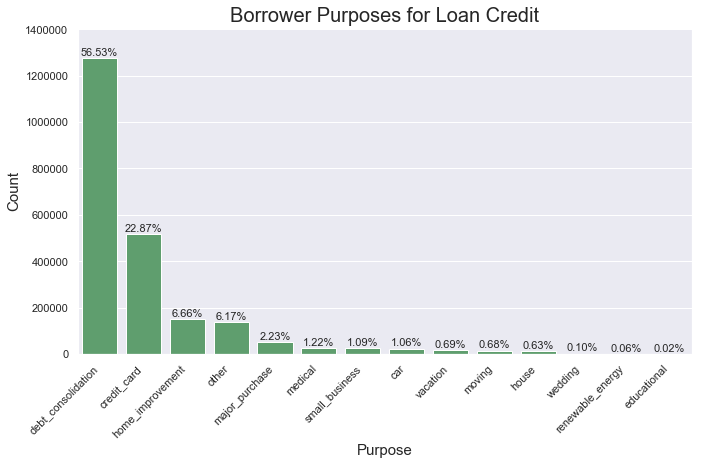

In [18]:
plt.figure(figsize=(11,6))

g = sns.countplot(x='purpose', data=df_loan,order = df_loan['purpose'].value_counts().index,color='g')
g.set_title("Borrower Purposes for Loan Credit", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Purpose", fontsize=15)
g.set_ylabel('Count', fontsize=15)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=11) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

# Purpose by Loan Status

In [19]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan['purpose'], df_loan['loan_status'],normalize='index') * 100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,
car,8.61,39.57,0,0.05,0.21,50.19,0.34,0.15,0.87
credit_card,9.41,43.41,0,0.01,0.05,45.86,0.33,0.14,0.79
debt_consolidation,12.6,39.05,0,0.02,0.06,46.68,0.42,0.17,0.99
educational,13.21,0.24,0,7.55,15.33,63.68,0,0,0
home_improvement,10.03,42.16,0,0.05,0.1,46.13,0.41,0.17,0.96
house,10.7,48.25,0,0.08,0.23,38.58,0.42,0.25,1.49
major_purchase,10.51,41.89,0,0.05,0.2,45.64,0.38,0.18,1.15
medical,11.97,43.34,0,0.08,0.13,42.68,0.44,0.2,1.16
moving,13.96,38.3,0.01,0.1,0.2,45.59,0.48,0.16,1.21


## Loan Amount
The highest frequency of loan amount requested by borrowes are about USD 10,000.
Generally, the loan borrower that does not meet the credit policy are request for lower loan amount than with other loan status.

C:\Users\venky\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


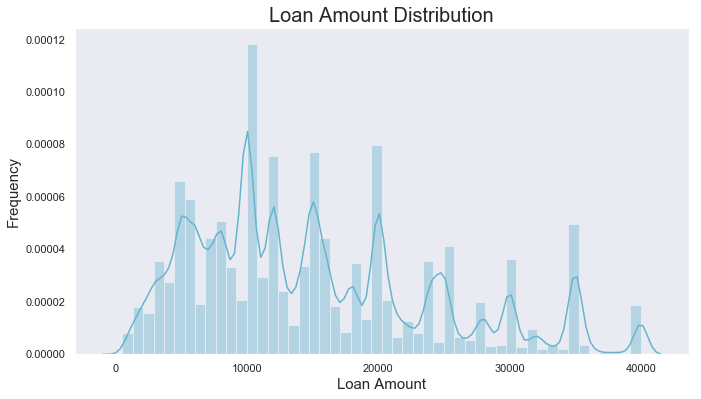

In [20]:
plt.figure(figsize=(11,6))
sns.set(style='dark')
g = sns.distplot(df_loan["loan_amnt"], color='c')
g.set_xlabel("Loan Amount", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)
g.set_title("Loan Amount Distribution", fontsize=20)
plt.show()


# Loan Amount by Loan Status

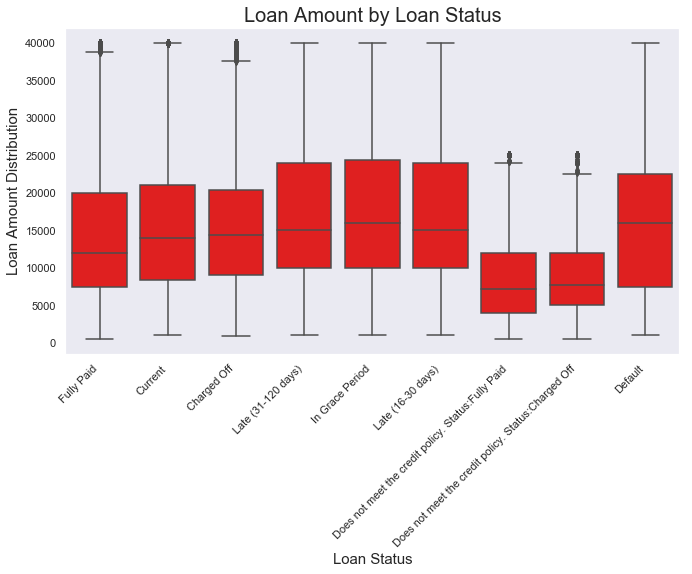

In [22]:
plt.figure(figsize=(11,6))

g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df_loan, order = df_loan['loan_status'].value_counts().index,color='red')
g2.set_xticklabels(g2.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g2.set_xlabel("Loan Status", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Amount by Loan Status", fontsize=20)

plt.show()

## Year Issued
The count of total loan significantly increase between 2012 and 2015. Afterward, the count keep increasing with constant rise until recent year.

# Total Loan by Year Issued¶

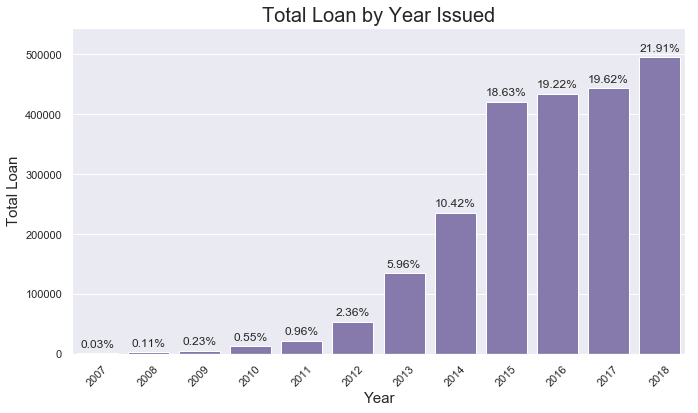

In [23]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str

plt.figure(figsize=(11,6))
sns.set(style='darkgrid')

g = sns.countplot(x='issue_year', data=df_loan, color='m')
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'center'},rotation=45)
g.set_xlabel("Year", fontsize=15)
g.set_ylabel("Total Loan", fontsize=15)
g.set_title("Total Loan by Year Issued", fontsize=20)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

## Application Type
Almost all of the loans are from individual application by 94.7% while the rest with small portion is from joint application (5.3%).
Loan application which does not meet credit policy come from individual application.
The distribution of loan amount of joint application nearly the same for all loan status and also similar to from individual app.
Those patter nearly the same with categorized by purpose except the wedding and educational purpose only come from individual app.

# Application Type Distribution

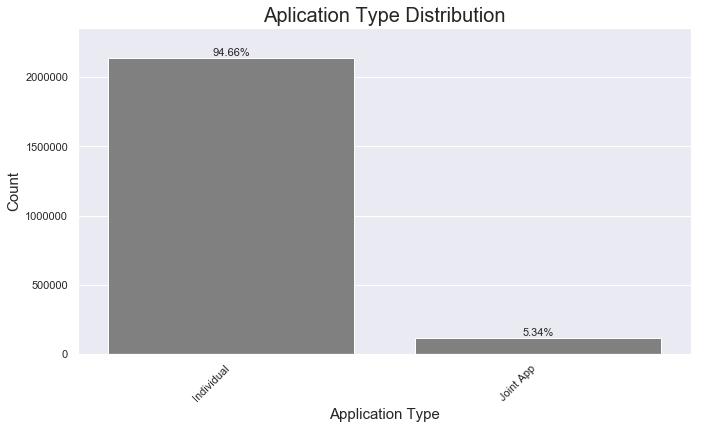

In [24]:
plt.figure(figsize=(11,6))

g = sns.countplot(x='application_type', data=df_loan,order = df_loan['application_type'].value_counts().index,color='gray')
g.set_title("Aplication Type Distribution", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel('Count', fontsize=15)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=11) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

# Loan Amount & Loan Status by Application Type

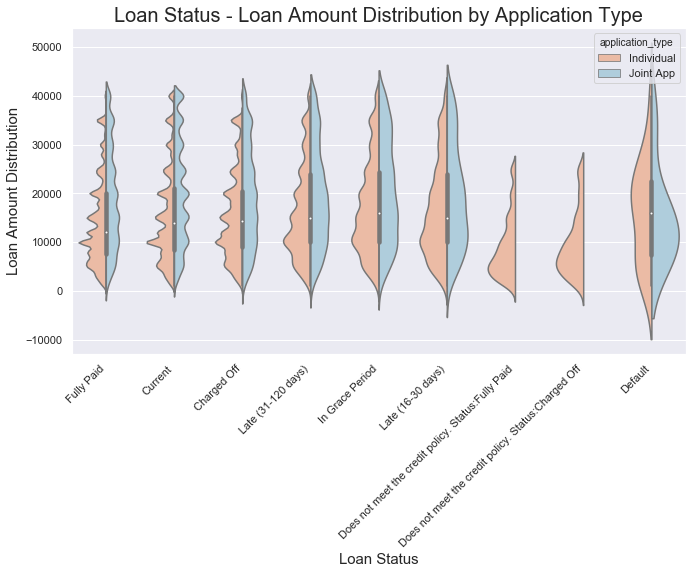

In [25]:
# Now will start exploring the Purpose variable
plt.figure(figsize=(11,6))

g = sns.violinplot(x="loan_status",y="loan_amnt",data=df_loan,hue="application_type", order = df_loan['loan_status'].value_counts().index,split=True, palette='RdBu')
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_title("Loan Status - Loan Amount Distribution by Application Type", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount Distribution", fontsize=15)

plt.show()

# Loan Amount & Purpose by Application Type

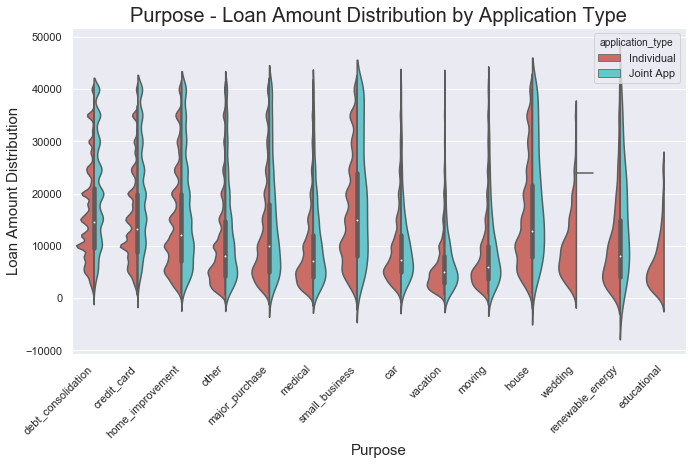

In [26]:
# Now will start exploring the Purpose variable
plt.figure(figsize=(11,6))

g = sns.violinplot(x="purpose",y="loan_amnt",data=df_loan,hue="application_type",order = df_loan['purpose'].value_counts().index ,split=True, palette='hls')
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_title("Purpose - Loan Amount Distribution by Application Type", fontsize=20)
g.set_xlabel("Purpose", fontsize=15)
g.set_ylabel("Loan Amount Distribution", fontsize=15)

plt.show()

## Annual Income
There are outliers value in annual income for each loan status.
The quantile 25%, 50%, and 75% of annual income for each loan status has similiar value distribution.
What differentiate is the value distribution of outlier values for each loan status.

# Loan Status by Annual Income

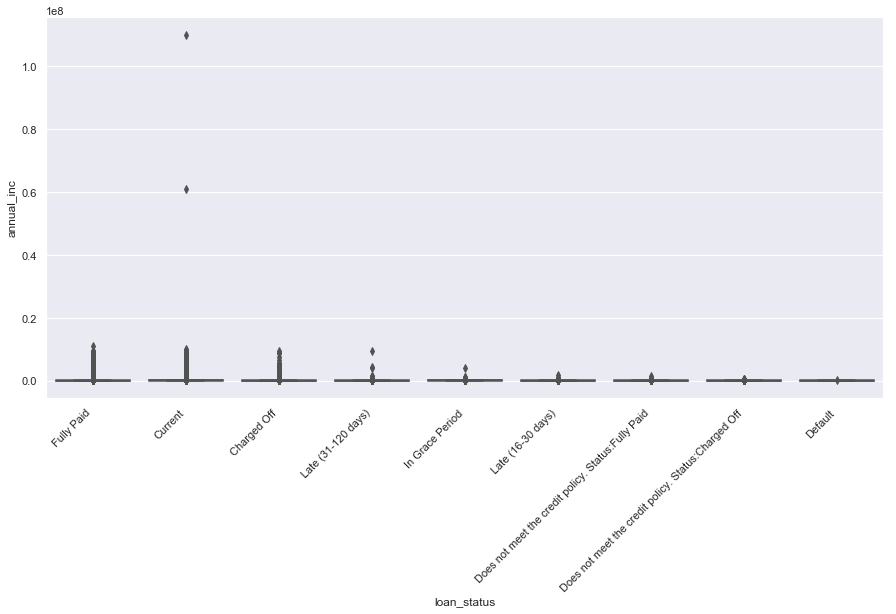

In [27]:
plt.figure(figsize=(15,7))
gg = sns.boxplot(x="loan_status", y="annual_inc", data=df_loan, order = df_loan['loan_status'].value_counts().index,color='r')
gg.set_xticklabels(gg.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
plt.show()

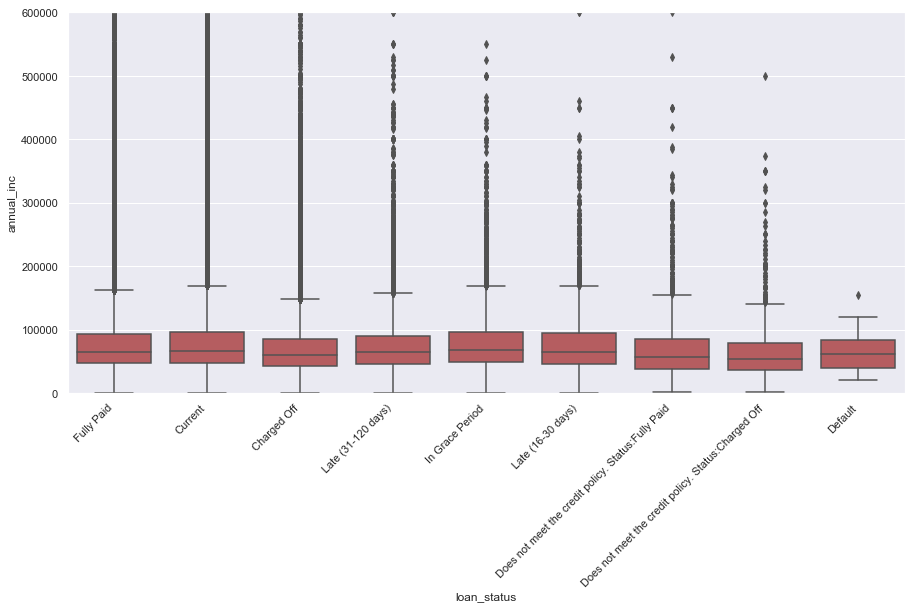

In [28]:
q3=df_loan['annual_inc'].quantile([0.999]).values
# Exclude data outside quantile 9.999%
plt.figure(figsize=(15,7))
gg = sns.boxplot(x="loan_status", y="annual_inc", data=df_loan, order = df_loan['loan_status'].value_counts().index,color='r')
gg.set_xticklabels(gg.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
plt.ylim([0,q3])
plt.show()


## Home Ownership
The top three home ownership for the loan application throughout 2007-2018: Mortgage (49%), Rent (39.6%), Own (11.2%).

Generally, the loan amount value distribution from joint application is higher than from individual application.

The Home Ownership tends to does not strongly correlated with status loan since the chance rate for all status loan by all home ownership is relatively similar each other.

# Home Ownership Distribution

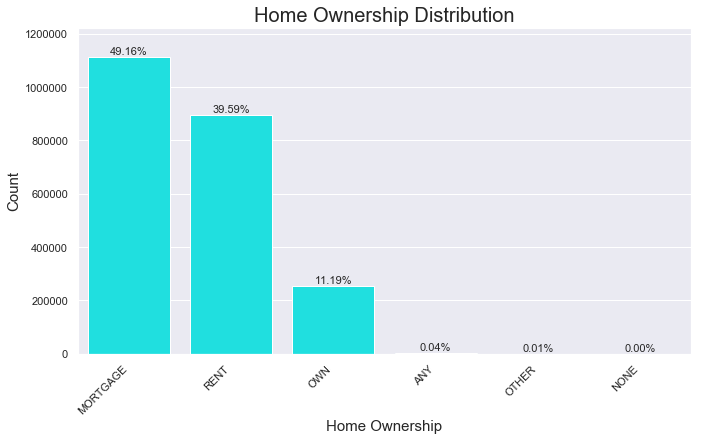

In [29]:
plt.figure(figsize=(11,6))

g = sns.countplot(x='home_ownership', data=df_loan,order = df_loan['home_ownership'].value_counts().index,color='cyan')
g.set_title("Home Ownership Distribution", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Home Ownership", fontsize=15)
g.set_ylabel('Count', fontsize=15)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=11) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

# Home Ownership & Loan Amount by Application Type

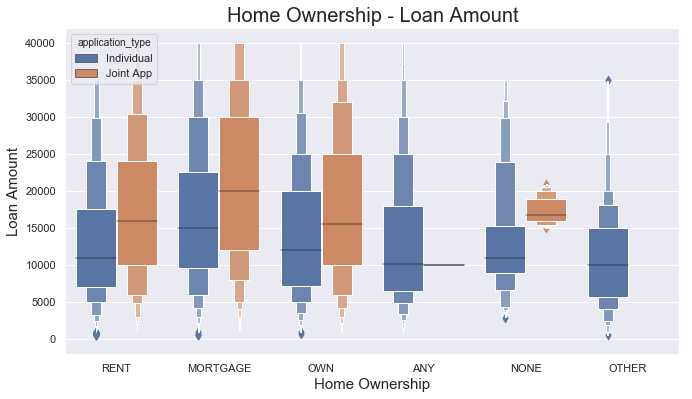

In [30]:
plt.figure(figsize = (11,6))

g = sns.boxenplot(x="home_ownership",y="loan_amnt",data=df_loan,hue="application_type")
g.set_title("Home Ownership - Loan Amount", fontsize=20)
g.set_xlabel("Home Ownership", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)
plt.show()

# Loan Status by Home Ownership

In [31]:
cm = sns.light_palette("cyan", as_cmap=True)
round(pd.crosstab(df_loan['loan_status'], df_loan['home_ownership'],normalize='columns')*100,2).fillna(0).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,5.22,10.05,12.96,14.84,11.46,13.51
Current,70.88,40.43,1.85,0,42.97,40.32
Default,0,0,0,0,0,0
Does not meet the credit policy. Status:Charged Off,0,0.03,1.85,6.04,0.02,0.04
Does not meet the credit policy. Status:Fully Paid,0,0.08,7.41,14.84,0.05,0.1
Fully Paid,21.59,48.03,75.93,64.29,43.8,44.35
In Grace Period,0.7,0.37,0,0,0.43,0.41
Late (16-30 days),0.3,0.16,0,0,0.18,0.17
Late (31-120 days),1.31,0.85,0,0,1.08,1.09


## Grade and Sub-Grade

In Fully Paid cases, all grade has the similar chance rate by about 40%-50%. In charged off cases, grade E,F,G have the highest chance rate of occurency.
While F1,F2,F3,F4,F5,G1,G2,G3,G4,and G5 sub-grade have the highest chance rate of charged off by moret than 30%.

# Loan Status by Grade

In [32]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan['loan_status'], df_loan['grade'], normalize='columns')*100,2).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,3.18,7.7,12.81,18.32,26.07,34.12,36.83
Current,47.21,41.51,41.12,37.19,29.62,21.55,21.64
Default,0,0,0,0,0,0,0
Does not meet the credit policy. Status:Charged Off,0,0.01,0.02,0.06,0.12,0.22,0.59
Does not meet the credit policy. Status:Fully Paid,0.02,0.04,0.07,0.15,0.28,0.37,1
Fully Paid,49.07,49.59,44.1,41.87,41.44,41.2,36.73
In Grace Period,0.15,0.3,0.49,0.61,0.59,0.55,0.76
Late (16-30 days),0.06,0.12,0.2,0.26,0.25,0.27,0.34
Late (31-120 days),0.3,0.72,1.18,1.54,1.64,1.72,2.1


# Loan Status by Sub-Grade

In [34]:
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan['loan_status'], df_loan['sub_grade'], normalize='columns')*100,2).style.background_gradient(cmap = cm)

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,1.57,2.41,2.77,3.62,4.86,5.74,6.44,7.87,8.58,9.53,10.81,12.19,12.73,14.17,14.61,17.06,17.69,17.99,19.73,20.21,25.08,26.41,26.15,27.16,25.91,30.81,34.52,34.76,37.46,37.08,34.22,38.39,39.16,37.68,36.99
Current,52.17,48.08,49.4,46.7,41.62,44.09,42.37,38.52,41.05,41.71,41.61,39.57,41.79,41.05,41.6,36.66,37.87,38.36,36.52,36.3,28.44,27.38,29.74,29.51,34.28,24.22,21.18,19.79,18.62,21.39,24.84,18.08,20.06,20.39,22.83
Default,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0.01,0,0,0.02,0,0,0,0,0
Does not meet the credit policy. Status:Charged Off,0,0,0,0,0,0.01,0.01,0.01,0.02,0.02,0.02,0.03,0.03,0.02,0.02,0.04,0.06,0.06,0.08,0.08,0.11,0.12,0.13,0.15,0.07,0.16,0.18,0.24,0.33,0.31,0.32,0.37,0.48,1.17,1.21
Does not meet the credit policy. Status:Fully Paid,0,0.01,0.02,0.02,0.04,0.03,0.03,0.05,0.04,0.05,0.07,0.08,0.07,0.08,0.07,0.11,0.12,0.17,0.2,0.21,0.24,0.32,0.29,0.28,0.28,0.31,0.43,0.39,0.36,0.39,0.56,0.71,0.96,1.34,2.36
Fully Paid,45.97,49.05,47.24,49.07,52.82,49.19,50.18,52.52,49.08,47.19,45.96,46.42,43.57,42.56,41.43,44.02,41.96,40.91,41.02,40.4,44.09,43.64,41.08,40.37,36.1,42,41.39,42.15,40.64,37.99,36.87,39.69,36.91,35.81,32.02
In Grace Period,0.1,0.14,0.19,0.14,0.19,0.25,0.27,0.26,0.33,0.38,0.43,0.44,0.49,0.51,0.6,0.56,0.6,0.6,0.63,0.67,0.45,0.53,0.63,0.61,0.79,0.51,0.48,0.71,0.44,0.68,0.78,0.6,0.72,0.99,0.83
Late (16-30 days),0.02,0.07,0.06,0.07,0.07,0.11,0.1,0.11,0.13,0.16,0.15,0.18,0.2,0.24,0.26,0.22,0.25,0.27,0.27,0.3,0.18,0.2,0.22,0.3,0.37,0.25,0.24,0.32,0.29,0.31,0.32,0.22,0.33,0.18,0.77
Late (31-120 days),0.16,0.23,0.31,0.38,0.39,0.58,0.6,0.66,0.78,0.94,0.96,1.07,1.12,1.36,1.42,1.34,1.46,1.64,1.55,1.84,1.41,1.4,1.75,1.61,2.21,1.75,1.57,1.64,1.86,1.84,2.09,1.93,1.38,2.45,3


## Revolving Line Utilization Rate
Overall, default cases occur to borrower with revolving line utilization rate more than 50%. While in fully paid cases, mostly the revolving utilization rate less than 50%.

In [33]:
cm = sns.light_palette("purple", as_cmap=True)
round((pd.crosstab(df_loan['loan_status'], df_loan['purpose'],values=df_loan['revol_util'], aggfunc='mean')).fillna(0),2).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,46.57,59.03,56.07,46.12,46.74,42.66,41.65,49.84,49.88,49.54,52.55,47.33,47.29,51.3
Current,39.3,51.38,49.39,58.8,40.73,33.4,36.89,42.99,44.39,42.72,42.18,40.85,43.71,57.58
Default,25.1,75.85,57.68,0,22.6,0,0,98.8,65.3,59.5,0,0,0,0
Does not meet the credit policy. Status:Charged Off,58.05,63.08,61.01,42.52,45.78,34.54,41.6,59.75,46.85,56.24,90.4,43.59,19.35,52.85
Does not meet the credit policy. Status:Fully Paid,46.08,57.2,58.41,45.14,44.86,34.35,40.24,52.82,54.09,46.62,51,42.49,45.29,43
Fully Paid,39.2,55.23,52.42,37.22,41.85,35.86,38.11,45.62,47.2,46.06,46.21,42.73,45.39,46.31
In Grace Period,43.68,56.94,54.5,0,46.9,38.29,37.85,45.95,42.28,46.02,48.43,41.63,40.5,0
Late (16-30 days),49.5,53.88,52.81,0,44.1,36.95,35.89,43.85,37.2,43.8,63.55,43.57,35.85,0
Late (31-120 days),41.88,53.48,51.94,0,42.76,36.57,38.25,43.84,44.59,43.45,43.18,44.49,41.75,0


## Employment Title
The top five borrower by the employment title: Teacher, Manager, Owner, Nurse, and Drive.
Overall, the chance rate of fully paid for all emplyment title is similar by 40-50%, except Owner (34%) and Drive (37%).
Driver, Truck Driver, and Store Manager have the largest chance rate of charged off by more than 14%, while other employment title lower than 12% rate.

# Employment Title Distribution

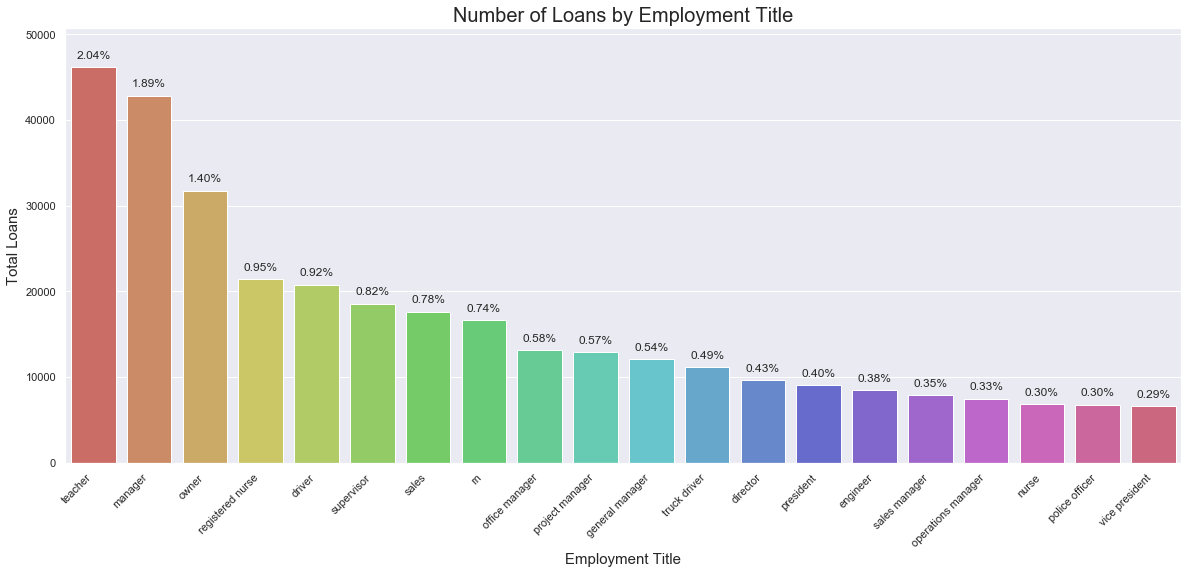

In [35]:
# Into lowercase
df_loan['emp_title']=df_loan['emp_title'].str.lower()

plt.figure(figsize=(20,8))
sns.set(style='darkgrid')

g = sns.countplot(x='emp_title', data=df_loan, palette='hls',order = df_loan['emp_title'].value_counts().index.values[:20])
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Employment Title", fontsize=15)
g.set_ylabel("Total Loans", fontsize=15)
g.set_title("Number of Loans by Employment Title", fontsize=20)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 1000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()


# Loan Status by Employment Title

In [36]:
emp_title = df_loan.emp_title.value_counts()[:30].index.values 
cm = sns.light_palette("red", as_cmap=True)

round(pd.crosstab(df_loan[df_loan['emp_title'].isin(emp_title)]['emp_title'], df_loan[df_loan['emp_title'].isin(emp_title)]['loan_status'], normalize='index')*100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
emp_title,,,,,,,
account manager,10.88,41.39,0,46.19,0.38,0.12,1.03
accountant,9.59,41.59,0,47.51,0.25,0.16,0.91
administrative assistant,11.59,41.9,0,45.17,0.35,0.15,0.83
analyst,9.27,39.15,0,49.97,0.4,0.21,1
assistant manager,12.91,41.71,0,43.55,0.45,0.14,1.24
attorney,6.36,43.29,0,48.95,0.56,0.15,0.69
director,8.6,43.91,0,46.13,0.38,0.16,0.82
driver,15.1,45.06,0,37.75,0.44,0.25,1.4
engineer,9.43,40.84,0,48.26,0.33,0.15,0.99


# Grade by Employment Title

In [37]:
emp_title = df_loan.emp_title.value_counts()[:30].index.values 
cm = sns.light_palette("blue", as_cmap=True)

round(pd.crosstab(df_loan[df_loan['emp_title'].isin(emp_title)]['emp_title'], df_loan[df_loan['emp_title'].isin(emp_title)]['grade'], normalize='index')*100,2).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
emp_title,,,,,,,
account manager,19.3,30.24,29.61,13.2,5.41,1.74,0.51
accountant,19.9,31.09,28.34,13.14,5.42,1.53,0.58
administrative assistant,15.21,29.7,29.91,16.24,6.7,1.67,0.57
analyst,21.47,29.71,28.22,12.42,5.92,1.73,0.53
assistant manager,14.62,26.87,32.17,16.51,6.78,2.38,0.67
attorney,32.14,30.01,23.12,9.73,3.97,0.91,0.12
director,25.05,29.95,26.84,11.61,4.76,1.47,0.31
driver,14.76,28.8,31.14,16.43,6.32,1.92,0.64
engineer,25.51,29.4,26.17,11.71,5.06,1.61,0.54


# Sub-Grade by Employment Title

In [38]:
cm = sns.light_palette("blue", as_cmap=True)

round(pd.crosstab(df_loan[df_loan['emp_title'].isin(emp_title)]['emp_title'], df_loan[df_loan['emp_title'].isin(emp_title)]['sub_grade'], normalize='index')*100,2).style.background_gradient(cmap = cm)

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
emp_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
account manager,4.41,2.96,3.14,3.92,4.86,6.02,5.49,5.93,6.26,6.54,6.96,6.31,5.7,5.49,5.14,3.4,2.86,2.72,2.32,1.9,1.48,1.2,0.99,0.87,0.85,0.66,0.33,0.3,0.19,0.26,0.16,0.12,0.07,0.1,0.05
accountant,3.37,3.41,3.23,4.73,5.16,6.53,6.2,5.75,6.12,6.48,6.78,5.66,5.59,5.48,4.83,3.12,3.05,3,2.06,1.91,1.42,1.14,1.06,0.77,1.03,0.52,0.3,0.25,0.25,0.22,0.3,0.11,0.08,0.03,0.06
administrative assistant,2.27,2.18,2.9,3.9,3.95,5.5,5.29,5.79,6.25,6.87,6.2,5.64,6.15,6.35,5.57,4.2,3.5,3.2,2.92,2.42,1.53,1.7,1.38,0.78,1.3,0.62,0.48,0.3,0.13,0.13,0.22,0.15,0.1,0.03,0.07
analyst,4.83,3.02,3.73,4.66,5.22,5.77,6.18,5.5,5.86,6.41,6.35,6.09,5.37,5.88,4.54,3.41,2.66,2.47,2.17,1.7,1.36,1.47,1.11,0.92,1.06,0.62,0.38,0.36,0.19,0.17,0.21,0.13,0.09,0.09,0.02
assistant manager,2.16,2.4,2.63,3.11,4.32,4.38,5.39,4.97,5.66,6.47,6.82,6.33,6.45,7.19,5.37,3.62,3.93,3.18,3.62,2.16,1.38,1.51,1.57,1.2,1.12,0.79,0.35,0.55,0.31,0.39,0.33,0.12,0.06,0.08,0.08
attorney,9.18,5.56,5.12,6.13,6.16,7.49,5.52,6.1,6.08,4.82,5.96,4.66,4.45,4.6,3.45,2.51,2.36,1.8,1.67,1.4,1.06,1.08,0.76,0.61,0.47,0.34,0.17,0.17,0.1,0.13,0.08,0.02,0,0,0.02
director,6.67,3.95,3.92,5.18,5.33,6.07,5.75,5.88,6.3,5.95,6.79,5.08,5.31,5.39,4.27,2.91,2.54,2.31,2.24,1.62,1.15,0.78,1,1,0.83,0.4,0.32,0.21,0.34,0.2,0.11,0.06,0.07,0.06,0
driver,2.24,2.25,2.76,3.59,3.91,5.3,5.32,5.3,6.12,6.76,6.8,6.5,5.99,5.96,5.89,4.08,3.92,3.12,2.86,2.44,1.5,1.3,1.33,1.15,1.04,0.59,0.42,0.42,0.3,0.19,0.21,0.17,0.09,0.1,0.07
engineer,6.07,4.24,4.38,5.21,5.61,5.93,5.92,6.21,5.74,5.59,6.12,5.66,5.01,4.87,4.51,2.87,2.46,2.64,2.11,1.64,1.41,0.96,0.95,0.81,0.92,0.59,0.36,0.35,0.19,0.12,0.18,0.11,0.07,0.11,0.08


## Employment Length
Over 1/3 of the loans throughout 2007-2018 are requested by employee with working experienced 10 or above years. The rest portion evenly distributed by less than 1 year to 9 year employees.
Employee with experience less than 1 year have the least chance rate of fully paid plus have the largest rate of current status. Employee with experience 7,8, and 9 years has the best chance rate of fully paid status. The loan amount for each employment length category is similar each other.

# Employment Length Distribution

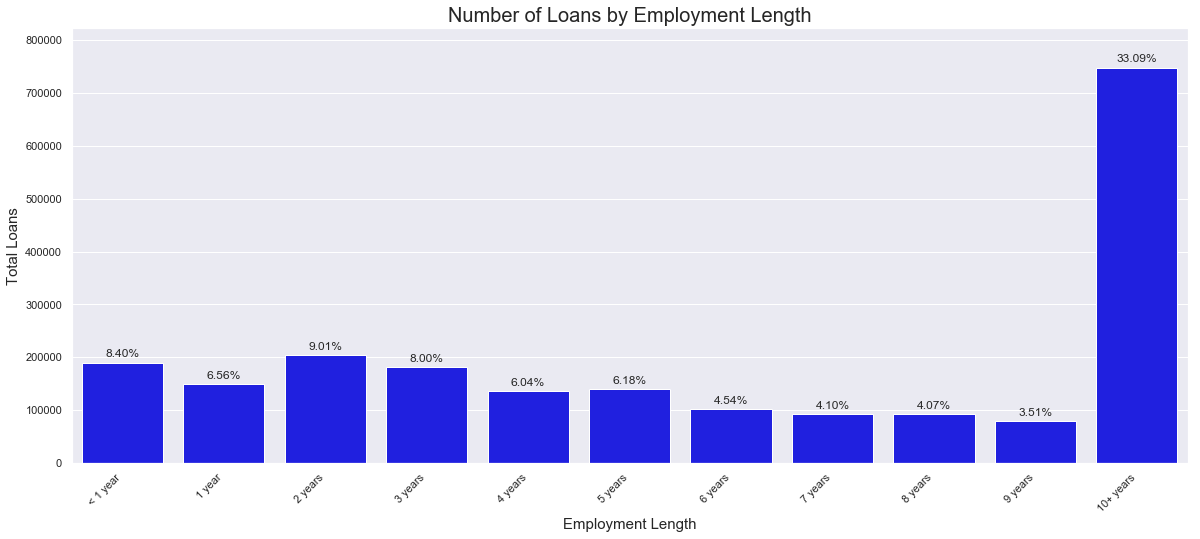

In [39]:
orders = ['< 1 year', '1 year', '2 years', '3 years','4 years', '5 years', '6 years', '7 years','8 years', '9 years', '10+ years']
plt.figure(figsize=(20,8))
sns.set(style='darkgrid')

g = sns.countplot(x='emp_length', data=df_loan, color='blue',order = orders)
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Employment Length", fontsize=15)
g.set_ylabel("Total Loans", fontsize=15)
g.set_title("Number of Loans by Employment Length", fontsize=20)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

# Loan Amount by Employment Length

No handles with labels found to put in legend.


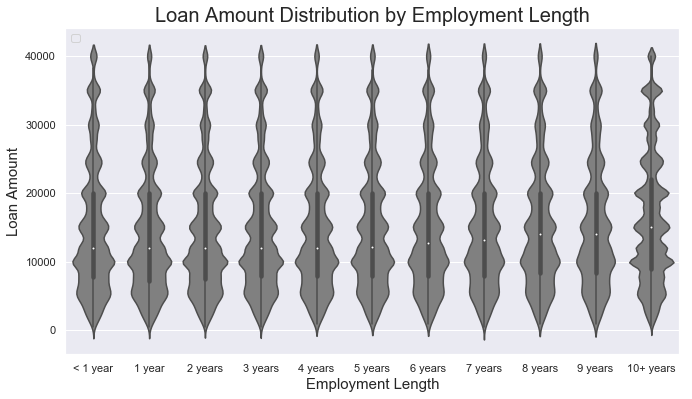

In [40]:
plt.figure(figsize = (11,6))

g = sns.violinplot(x="emp_length", y="loan_amnt",data=df_loan, color='gray',order=orders)
g.set_title("Loan Amount Distribution by Employment Length", fontsize=20)
g.set_xlabel("Employment Length", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.legend(loc='upper left')
plt.show()

# Loan Status by Employment Length

In [41]:
cm = sns.light_palette("red", as_cmap=True)
round(pd.crosstab(df_loan['emp_length'],df_loan['loan_status'],   normalize='index') * 100,3)[:15].style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
emp_length,,,,,,,,,
1 year,11.921,40.412,0.001,0.061,0.173,45.812,0.398,0.164,1.059
10+ years,10.819,41.205,0.001,0.021,0.042,46.473,0.388,0.153,0.899
2 years,11.527,40.424,0.002,0.041,0.131,46.32,0.414,0.157,0.984
3 years,11.581,40.621,0.002,0.04,0.107,46.067,0.417,0.16,1.005
4 years,11.363,41.173,0.003,0.041,0.109,45.757,0.411,0.149,0.994
5 years,11.508,39.919,0,0.036,0.087,46.92,0.397,0.158,0.975
6 years,11.554,39.011,0.001,0.042,0.098,47.818,0.42,0.157,0.898
7 years,12.279,35.865,0.003,0.035,0.073,50.448,0.33,0.139,0.827
8 years,12.906,34.177,0.002,0.035,0.082,51.421,0.37,0.154,0.854


## Loan Credit Title
Similar to Purpose feature, the title feature has the same pattern with debt consolidation, credit card refinancing, and home improvement have the largest share.



# Credit Loan Title Distributio

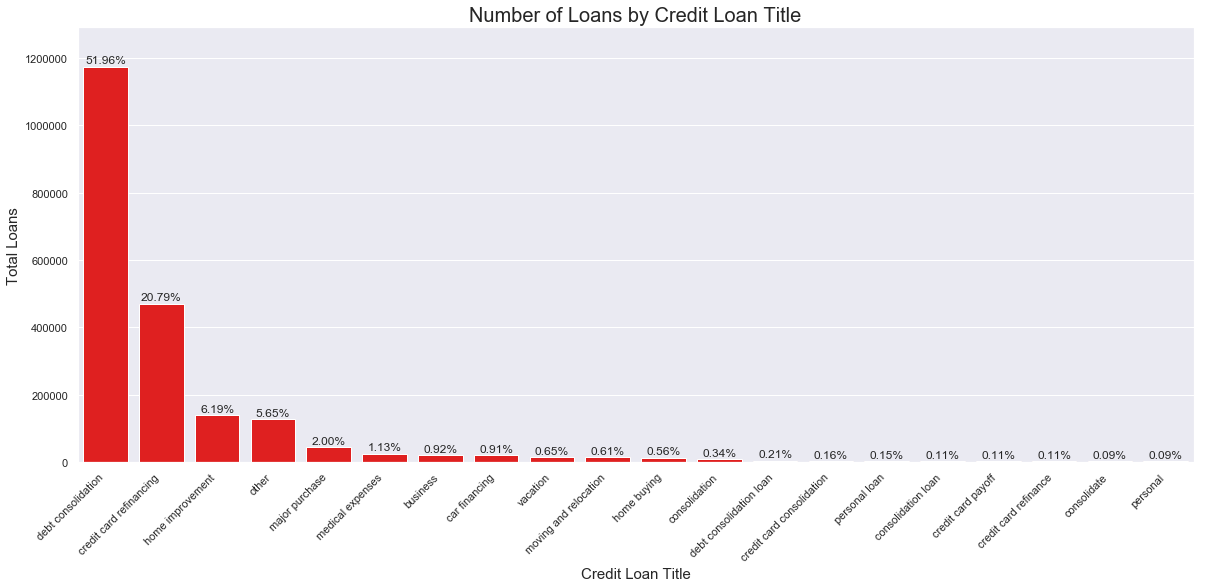

In [42]:
# Into lowercase
df_loan['title']=df_loan['title'].str.lower()

plt.figure(figsize=(20,8))
sns.set(style='darkgrid')

g = sns.countplot(x='title', data=df_loan, color='red',order = df_loan['title'].value_counts().index.values[:20])
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Credit Loan Title", fontsize=15)
g.set_ylabel("Total Loans", fontsize=15)
g.set_title("Number of Loans by Credit Loan Title", fontsize=20)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 10000,'{:1.2f}%'.format(height/total_data*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

## DTI Ratio (Debt to Income Ratio)
There are outliers DTI value for each loan status.
The quantile 25%, 50%, and 75% of DTI value distribution for each loan status has similiar value distribution.
What differentiate is the value distributino of outlier values for each loan status.


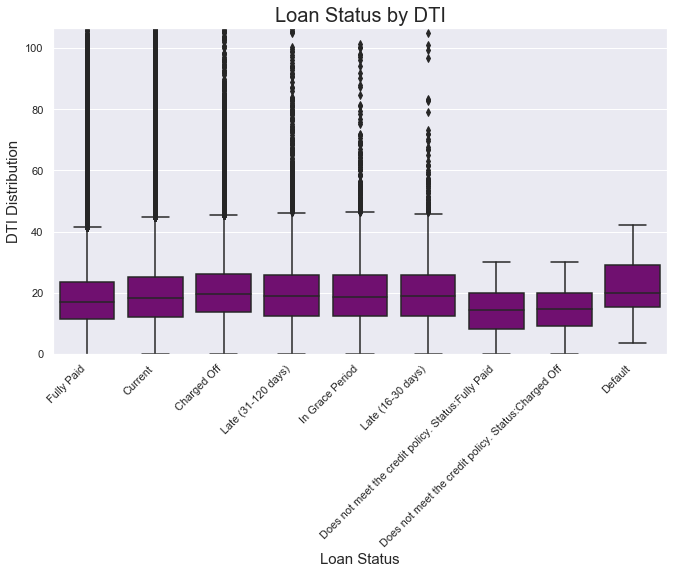

In [43]:
q3=df_loan['dti'].quantile([0.999]).values
plt.figure(figsize=(11,6))

g = sns.boxplot(x="loan_status", y="dti", data=df_loan, order = df_loan['loan_status'].value_counts().index,color='purple')
g.set_xticklabels(g.get_xticklabels(),fontdict={'horizontalalignment':'right'},rotation=45)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("DTI Distribution", fontsize=15)
g.set_title("Loan Status by DTI", fontsize=20)
plt.ylim([0,q3])
plt.show()

# Loan Status & Purpose by DTI

In [44]:
cm = sns.light_palette("yellow", as_cmap=True)
round((pd.crosstab(df_loan['loan_status'], df_loan['purpose'],values=df_loan['dti'], aggfunc='mean')).fillna(0),2).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,17.49,20.51,20.81,11.05,17.76,16.72,16.38,19.56,18.52,18.6,17.19,15.72,19.12,15.17
Current,16.38,19.73,20.26,17.07,18.22,15.48,16.44,19.35,18.61,17.84,17.78,15.85,19.38,13.84
Default,38.2,20.19,23.5,0,12.21,0,0,13.73,32.41,13.68,0,0,0,0
Does not meet the credit policy. Status:Charged Off,11.54,15.14,15.5,13.66,13.35,8.61,12.46,14.96,8.03,14.12,15.77,13.62,15.78,13.65
Does not meet the credit policy. Status:Fully Paid,9.92,15.7,15.7,10.19,13.37,10.24,11.54,15.16,12.44,12.68,7.34,11.68,10.6,13.04
Fully Paid,14.45,18.05,18.41,11.27,15.61,14.01,14.41,17.02,15.94,16.5,15.86,14.05,17.27,13.83
In Grace Period,18.51,20.7,20.63,0,17.71,14.96,16.23,19.25,20.34,18.26,23.49,14.58,18.49,0
Late (16-30 days),16.2,19.5,21.2,0,17.89,15.47,15.64,19.84,14.67,17.41,38.25,14.99,21.03,0
Late (31-120 days),16.54,20.75,20.95,0,18.26,14.62,16.38,19.22,16.33,18.55,15.37,16.2,18.65,0


# Feature Selection

# Dealing with the Dominant Missing Values

(0, 2260668)

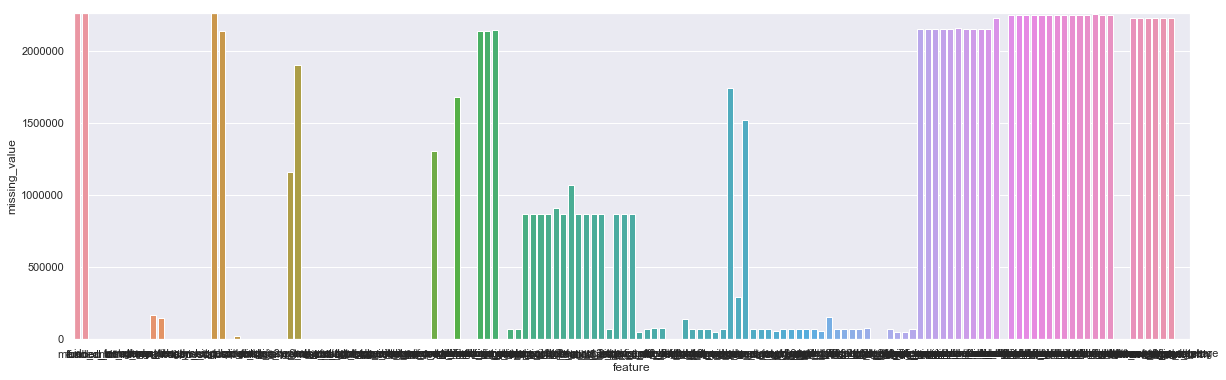

In [45]:
# Create a new dataframe to plot how dominant the missing values are
data={"feature":df_loan.columns,
     "missing_value":df_loan.isnull().sum()}
df1=pd.DataFrame(data=data)
plt.figure(figsize=(20,6))
sns.barplot(x='feature',y='missing_value',data=df1)
plt.ylim(0,df_loan.shape[0])

In [46]:
df1['missing_value'].describe()

count    1.470000e+02
mean     7.392310e+05
std      9.486615e+05
min      0.000000e+00
25%      2.900000e+01
50%      7.027600e+04
75%      2.137280e+06
max      2.260668e+06
Name: missing_value, dtype: float64

In [47]:
# select features that pass the threshold
chosen_feature=df1['feature'][df1['missing_value']<=2000].values

In [48]:
df_data=df_loan[chosen_feature]

In [49]:
df_data.shape

(2260668, 51)

In [50]:
df_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_month,issue_year
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N,Dec,2018
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,777.23,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N,Dec,2018
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,180.69,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,Dec,2018
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,146.51,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,Dec,2018
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,debt_consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0,731.78,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,Dec,2018


# Convert Loan Status into Good or Bad Loan

In [51]:
bad_loan = ["Charged Off","In Grace Period", "Default","Late (16-30 days)", "Late (31-120 days)","Does not meet the credit policy. Status:Charged Off"]
dat_temp=df_data.loan_status

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'

df_data['loan_status'] = df_data['loan_status'].apply(loan_condition)

C:\Users\venky\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


# Convert the Object Type into Numerical Type

# Feature Selection for Object Type
There are 17 features with object type. We will not convert all of those, but just the features that will have high impact for the model and feature with categorical values.

In [52]:
# Create a new dataframe specifically for object type
df_obj=df_data.select_dtypes(include='object')

In [53]:
df_obj.shape

(2260668, 20)

In [54]:
df_obj.describe(include=['O'])

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,issue_month,issue_year
count,2260668,2260668,2260668,2260668,2260668,2260668,2260668,2260668,2260668,2260667,2260668,2260639,2260668,2260595,2260668,2260668,2260668,2260668,2260668,2260668
unique,2,7,35,6,3,139,2,2,14,956,51,754,2,140,2,2,2,2,12,12
top,36 months,B,C1,MORTGAGE,Source Verified,Mar-2016,Good Loan,n,debt_consolidation,112xx,CA,Sep-2004,w,Feb-2019,Individual,N,Cash,N,Oct,2018
freq,1609754,663557,145903,1111450,886231,61992,1963635,2259986,1277877,23908,314533,15400,1535467,1398266,2139958,2259783,2182546,2227612,229215,495242


## Based on that descriptive statistics above, several categorical features need to be dropped because the level of values is too varied or not significantly influece the target variable (loan_status), as following:

issue_d
zip_code
addr_state
earliest_cr_line
last_credit_pull_d
disbursement_method
debt_settlement_flag

In [55]:
# drop some features
features_dropped = ['issue_d','zip_code','addr_state','earliest_cr_line','last_credit_pull_d','disbursement_method','debt_settlement_flag']
df_obj.drop(features_dropped,axis=1, inplace=True)
df_data.drop(features_dropped,axis=1, inplace=True)

C:\Users\venky\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Converting into Numerical Type (by using LabelEncoder)

In [56]:
features=df_obj.columns
for feature in features:
    le = LabelEncoder()
    le.fit(df_obj[feature])
    df_obj[feature]=list(le.transform(df_obj[feature]))
    df_data[feature]=df_obj[feature]

C:\Users\venky\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\venky\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 13 columns):
term                   int64
grade                  int64
sub_grade              int64
home_ownership         int64
verification_status    int64
loan_status            int64
pymnt_plan             int64
purpose                int64
initial_list_status    int64
application_type       int64
hardship_flag          int64
issue_month            int64
issue_year             int64
dtypes: int64(13)
memory usage: 224.2 MB


In [59]:
# update the dataframe by dropping the 'police_code' feature
df_data.drop('policy_code',axis=1, inplace=True)

In [60]:
temp_features=df_data.drop('loan_status',axis=1).columns
x1=list(temp_features[:14])
x1.append('loan_status')
x2=list(temp_features[14:27])
x2.append('loan_status')
x3=list(temp_features[27:len(temp_features)])
x3.append('loan_status')

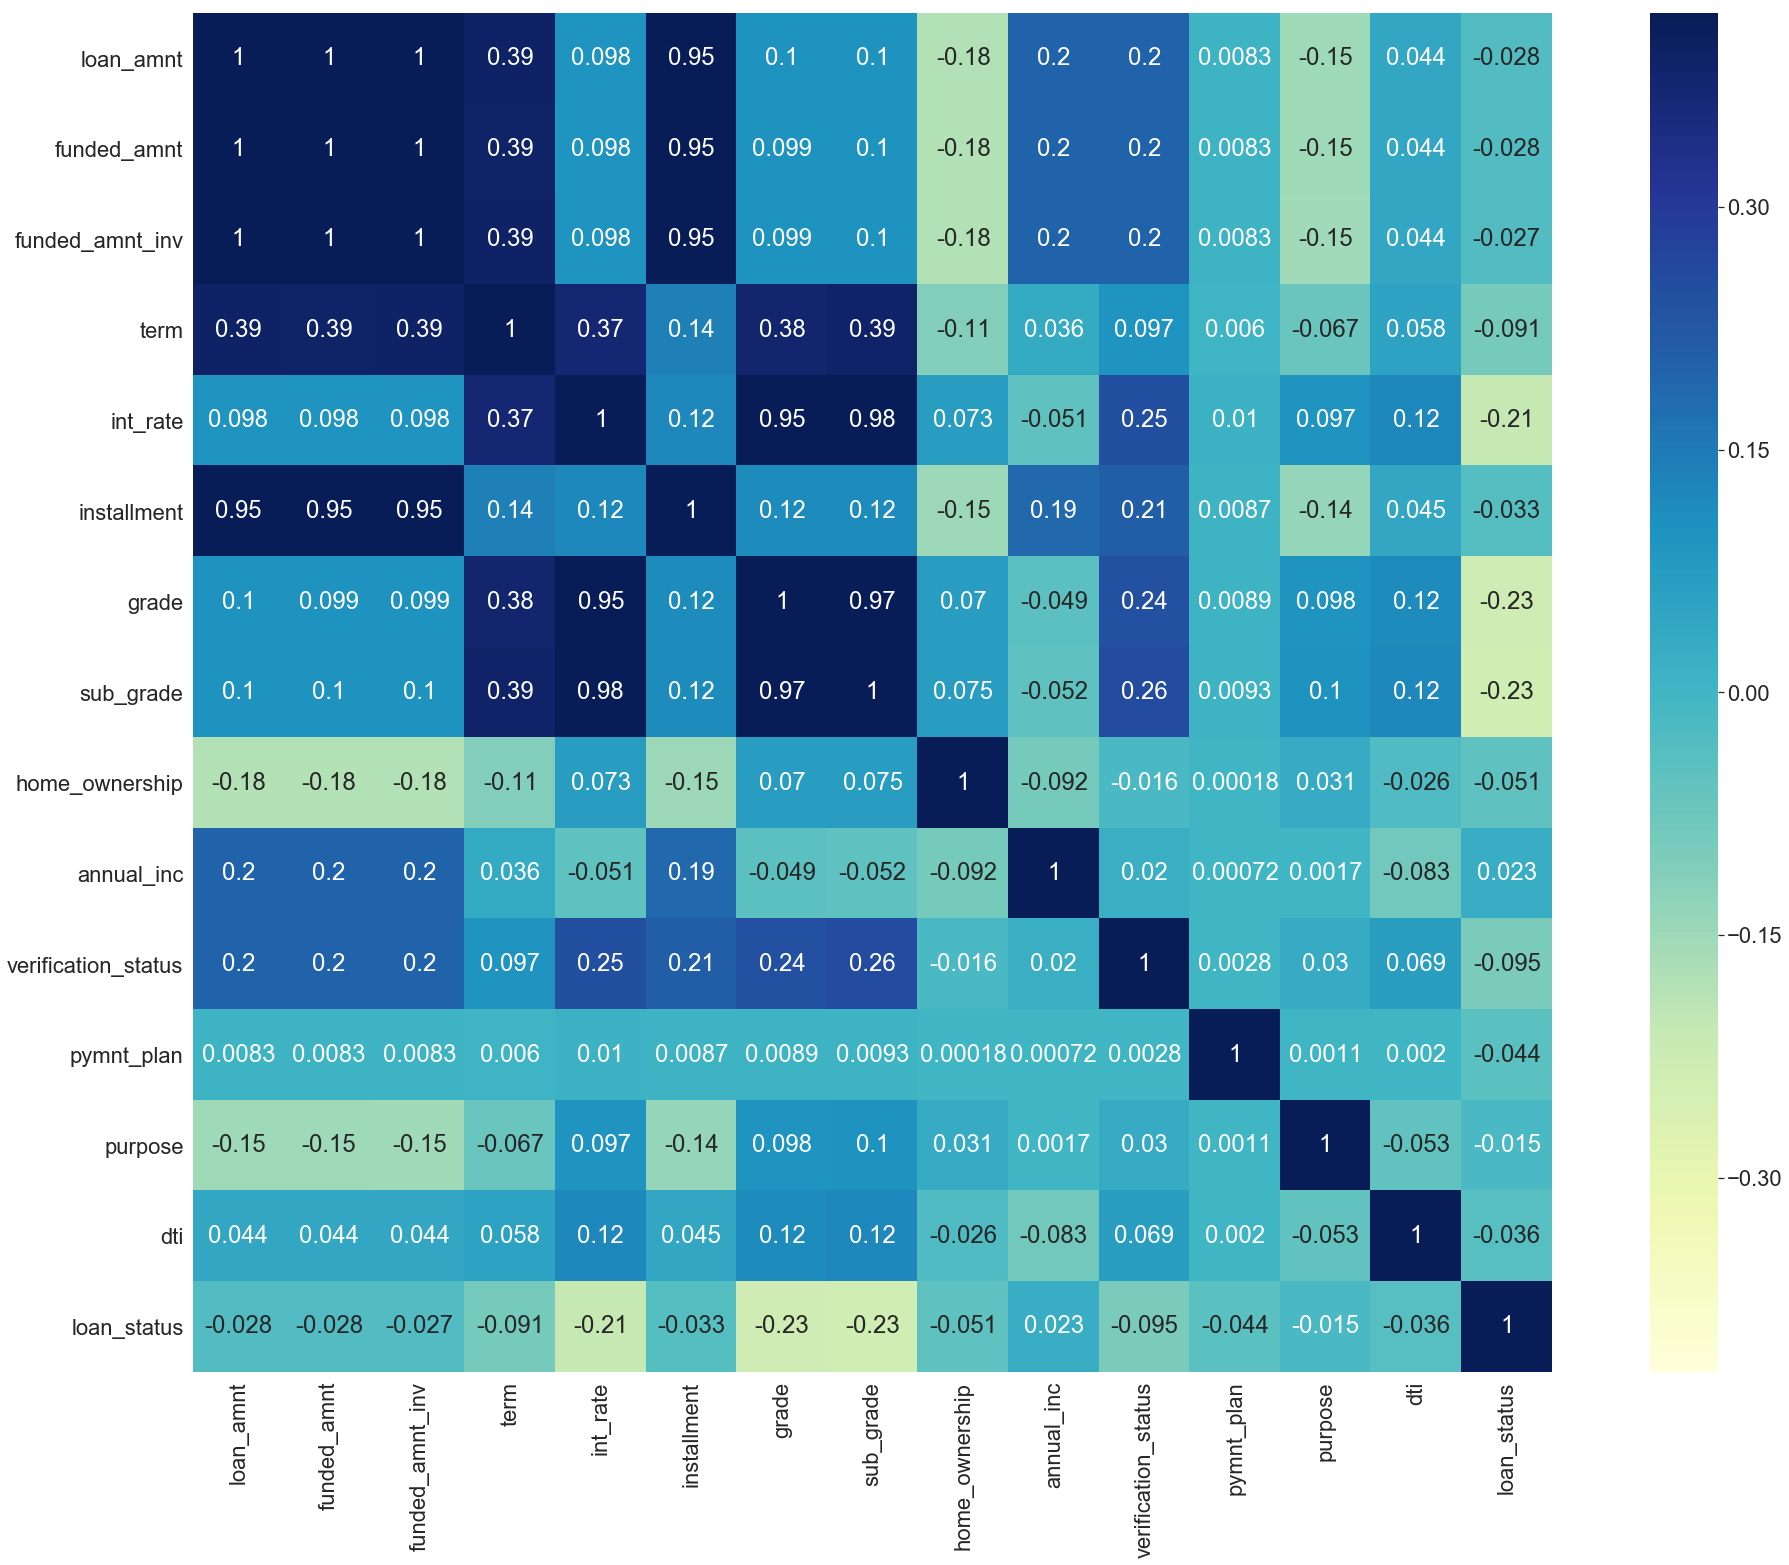

In [61]:
plt.figure(figsize=(35,25))
sns.set(font_scale=2)
sns.heatmap(df_data[x1].corr(), vmin=-0.42,vmax=0.42,square=True, annot=True,cmap='YlGnBu', cbar=True)

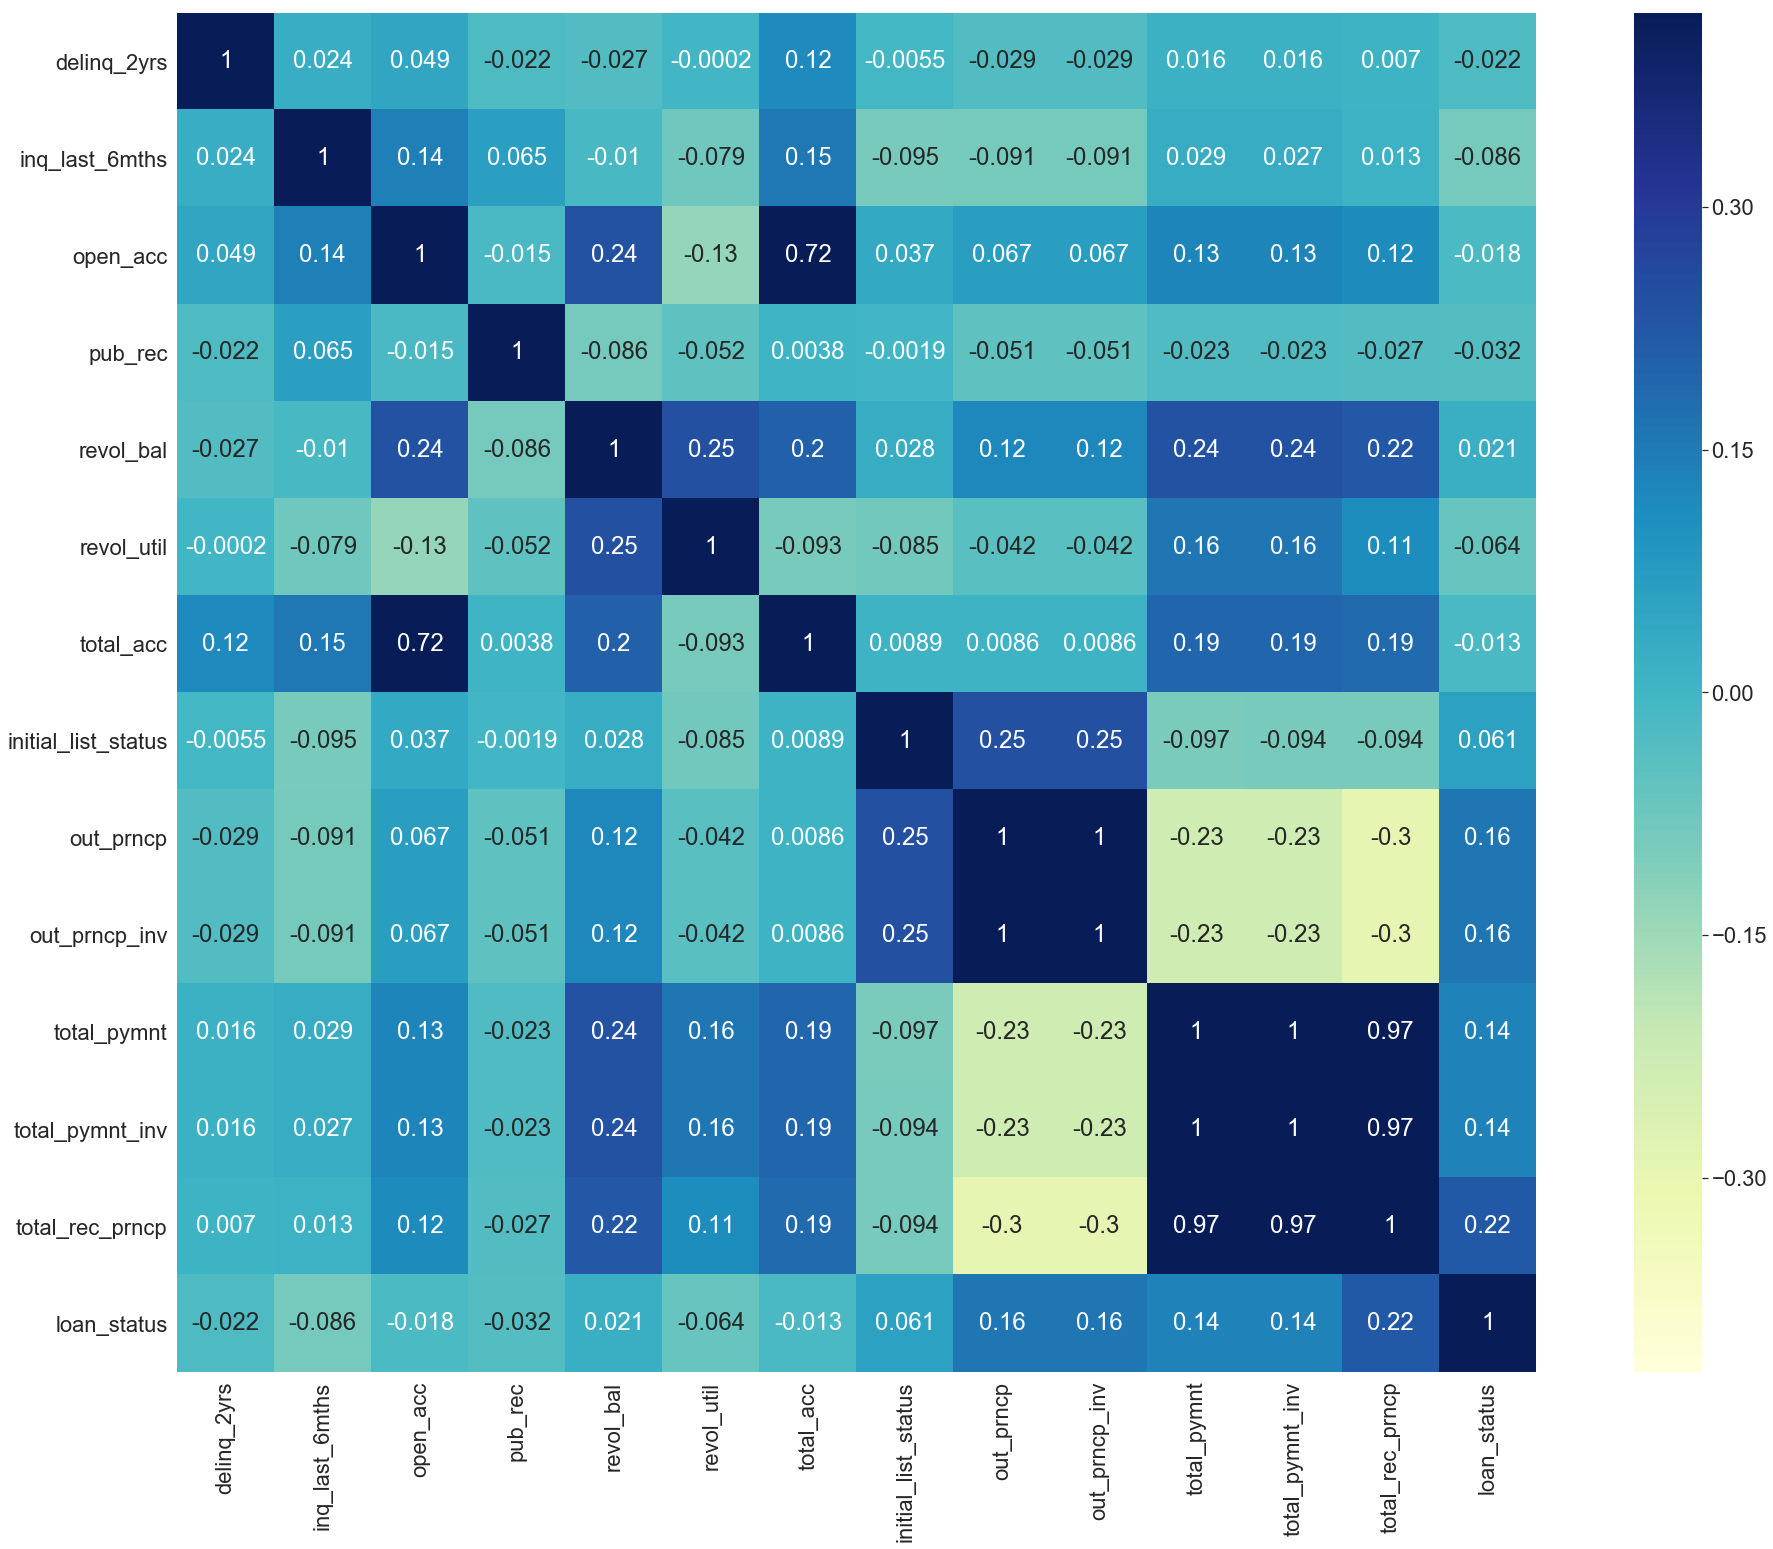

In [62]:
plt.figure(figsize=(35,25))
sns.heatmap(df_data[x2].corr(), vmin=-0.42,vmax=0.42,square=True, annot=True,cmap='YlGnBu', cbar=True)

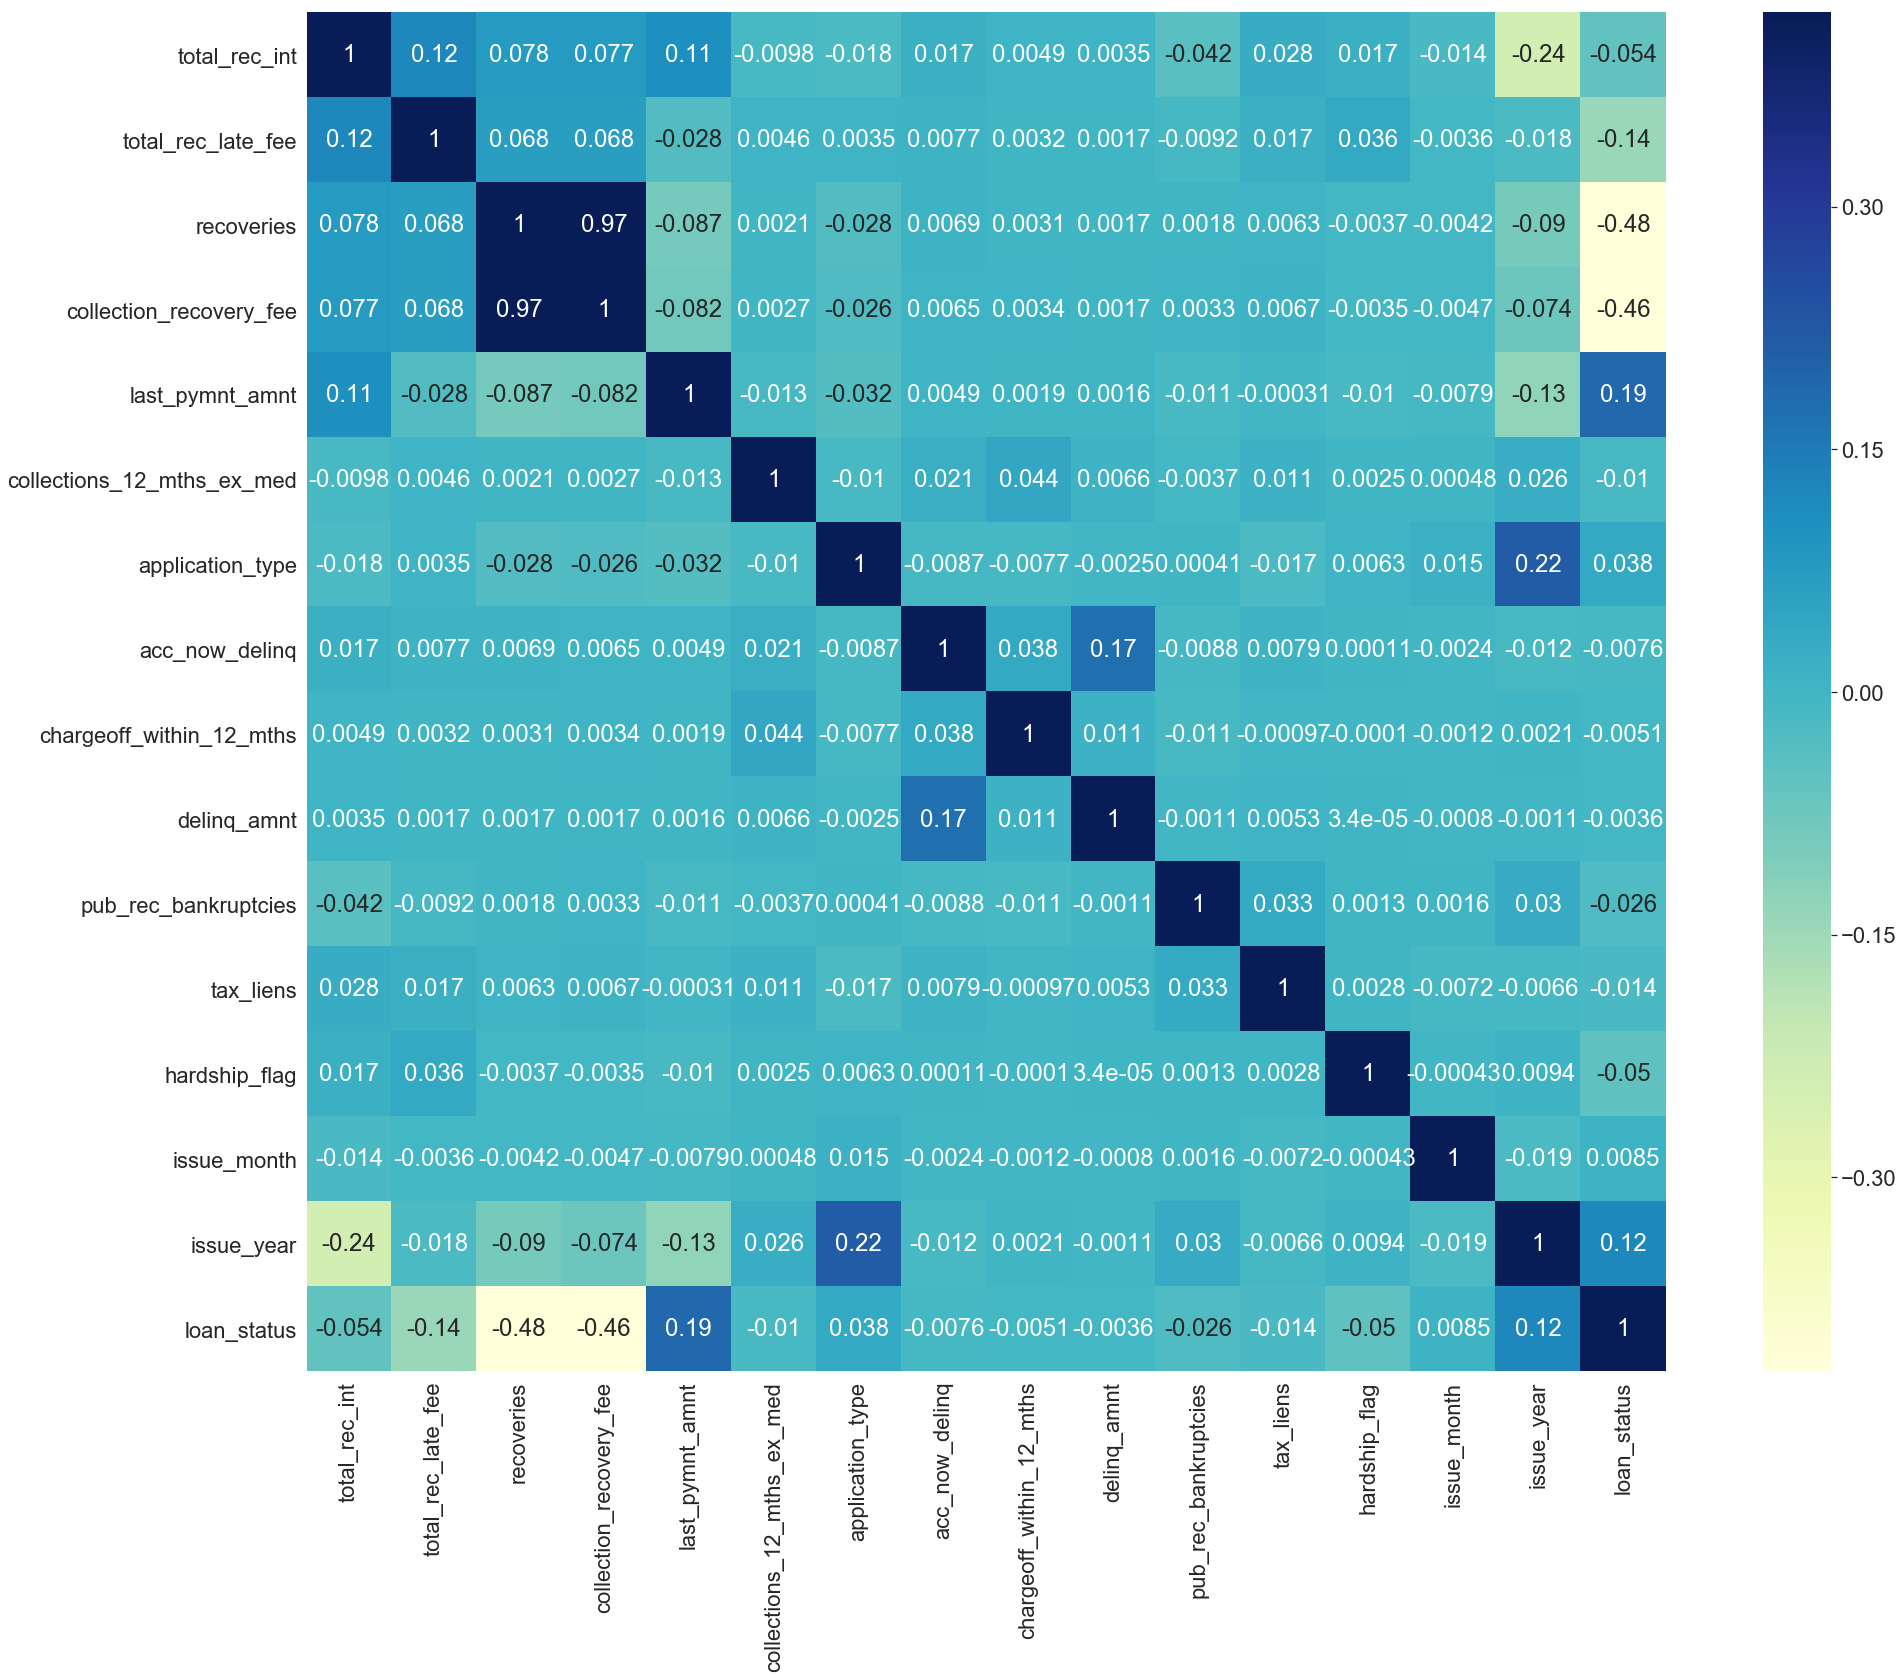

In [63]:
plt.figure(figsize=(35,25))
sns.heatmap(df_data[x3].corr(), vmin=-0.42,vmax=0.42,square=True, annot=True,cmap='YlGnBu', cbar=True)

# Feature Selection 

In [64]:
features_selected = ['loan_amnt','int_rate','term','grade','sub_grade','home_ownership','annual_inc','purpose',
                    'dti','revol_util','total_acc','last_pymnt_amnt','total_pymnt','loan_status']
df_data=df_data[features_selected]

In [65]:
df_data.isnull().sum()

loan_amnt             0
int_rate              0
term                  0
grade                 0
sub_grade             0
home_ownership        0
annual_inc            4
purpose               0
dti                1711
revol_util         1802
total_acc            29
last_pymnt_amnt       0
total_pymnt           0
loan_status           0
dtype: int64

# Handle the missing value

In [66]:
df_data.annual_inc.fillna(df_data.annual_inc.median(), inplace=True)     
df_data.dti.fillna(df_data.dti.median(), inplace=True)
df_data.revol_util.fillna(df_data.revol_util.median(), inplace=True)
df_data.total_acc.fillna(df_data.total_acc.median(), inplace=True)

In [67]:
df_data.isnull().sum()

loan_amnt          0
int_rate           0
term               0
grade              0
sub_grade          0
home_ownership     0
annual_inc         0
purpose            0
dti                0
revol_util         0
total_acc          0
last_pymnt_amnt    0
total_pymnt        0
loan_status        0
dtype: int64

# Model Building

# Splitting into Training and Testing Set

In [68]:
# Splitting the dataset in X (features) and Y (target variable)
X=df_data.drop(['loan_status'],axis=1)
Y=df_data['loan_status']

# Splitting the dataset in training (75%) and testing set (25%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [69]:
#Feature Scaling
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

C:\Users\venky\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Model Fitting

So far the candidate for model algorithms as follow:
Logistic Regression
Decision Tree
Random Forest
Bagging Classifier

# Import the Modules

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [71]:
# Logistic Regression
clf_log_reg = LogisticRegression()
clf_log_reg.fit(X_train, Y_train)
acc_log_reg=round((cross_val_score(clf_log_reg,X_train, Y_train, cv=3,scoring='accuracy').mean())*100,2)
print("Accuracy: "+str(acc_log_reg)+"%")

C:\Users\venky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\venky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 88.39%


# SVM

In [ ]:
# Support Vector Machine
clf_svc=SVC() 
clf_svc.fit(X_train, Y_train)
acc_svc=round((cross_val_score(clf_svc,X_train, Y_train, cv=3,scoring='accuracy').mean())*100,2)
print("Accuracy: "+str(acc_svc)+"%")



# Decision Tree

In [75]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, Y_train)
acc_decision_tree=round((cross_val_score(clf_dt,X_train, Y_train, cv=3,scoring='accuracy').mean())*100,2)
print("Accuracy: "+str(acc_decision_tree)+"%")

Accuracy: 94.48%


# Random Forest

In [76]:
# Random Forest
clf_rf = RandomForestClassifier(n_estimators=3)
clf_rf.fit(X_train, Y_train)
acc_random_forest=round((cross_val_score(clf_rf,X_train, Y_train, cv=3,scoring='accuracy').mean())*100,2)
print("Accuracy: "+str(acc_random_forest)+"%")

Accuracy: 92.41%


In [ ]:
from sklearn.ensemble import BaggingClassifier 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Bagging (estimator KNN)
clf_bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=3,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
clf_bagging.fit(X_train, Y_train)
acc_bagging=round((cross_val_score(clf_bagging,X_train, Y_train, cv=3,scoring='accuracy').mean())*100,2)
print("Accuracy: "+str(acc_bagging)+"%")

# Model Prediction

In [83]:
# Predicting & Model Evaluation

# Predicting the results
log_pred = clf_log_reg.predict(X_test)
#svc_pred = clf_svc.predict(X_test)
dt_pred = clf_dt.predict(X_test)
rf_pred = clf_rf.predict(X_test)
#bag_pred = clf_bagging.predict(X_test)

# Model Validation

###  Confusion Matrix from Logistic Regression

In [84]:
# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(Y_test,log_pred)
accuracy_1 = (cm_log[0,0]+cm_log[1,1])/len(Y_test)

### Confusion Matrix from Decision Tree

In [85]:
cm_dt = confusion_matrix(Y_test,dt_pred)
accuracy_4 = (cm_dt[0,0]+cm_dt[1,1])/len(Y_test)
cm_dt

array([[ 58794,  15522],
       [ 34509, 456342]], dtype=int64)

### Confusion Matrix from Random Forest

In [86]:
cm_rf = confusion_matrix(Y_test,rf_pred)
accuracy_5 = (cm_rf[0,0]+cm_rf[1,1])/len(Y_test)
cm_rf

array([[ 43140,  31176],
       [ 20169, 470682]], dtype=int64)

In [87]:
print("Accuracy Logistic Regression in Testing Set:",accuracy_1*100,'%',
      #"\nAccuracy SVC:",accuracy_2*100,'%',
      "\nAccuracy Decision Tree in Testing Set:",accuracy_4*100,'%',
      "\nAccuracy Random Forest in Testing Set:",accuracy_5*100,'%')
      #"\nAccuracy Bagging Classifier:",accuracy_6*100,'%'

Accuracy Logistic Regression in Testing Set: 88.38555683541325 % 
Accuracy Decision Tree in Testing Set: 91.14757231048522 % 
Accuracy Random Forest in Testing Set: 90.91507465934848 %
